# Olive Oil Analysis

This data is from a paper by Forina, Armanino, Lanteri, Tiscornia (1983) Classification of Olive Oils from their Fatty Acid Composition, in Martens and Russwurm (ed) Food Research and Data Anlysis. \
Source: https://github.com/HadilHelali/olive-oil-classification/blob/main/olive_original.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/HadilHelali/olive-oil-classification/main/olive_original.csv"
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 1 to 572
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   572 non-null    object
 1   Region       572 non-null    int64 
 2   Area         572 non-null    int64 
 3   palmitic     572 non-null    int64 
 4   palmitoleic  572 non-null    int64 
 5   stearic      572 non-null    int64 
 6   oleic        572 non-null    int64 
 7   linoleic     572 non-null    int64 
 8   linolenic    572 non-null    int64 
 9   arachidic    572 non-null    int64 
 10  eicosenoic   572 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 53.6+ KB


In [4]:
data.head()

,Unnamed: 0,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
1,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
2,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
3,North-Apulia,1,1,911,54,246,8113,549,31,63,29
4,North-Apulia,1,1,966,57,240,7952,619,50,78,35
5,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [5]:
data.rename(columns={'Unnamed: 0' : 'Name'}, inplace=True)

# Data exploration

In [7]:
df_count = data[['Area']].sort_values(['Area']).value_counts().sort_index()
df_count

Area
1        25
2        56
3       206
4        36
5        65
6        33
7        50
8        50
9        51
Name: count, dtype: int64

In [8]:
df_group = data.groupby(['Name', 'Region', 'Area']).mean().round(2).sort_values(['Region', 'Area'])
df = df_group.assign(count= df_count.values)
df = df[[df.columns[-1]] + df.columns[:-1].to_list()]
df

,,,count,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
Name,Region,Area,,,,,,,,,
North-Apulia,1,1,25,1027.00,61.60,234.84,7820.40,705.84,42.56,71.96,34.56
Calabria,1,2,56,1302.23,121.36,262.52,7307.18,819.00,45.57,63.62,28.32
South-Apulia,1,3,206,1395.67,183.92,210.98,6911.21,1166.31,34.71,59.73,24.23
Sicily,1,4,36,1228.36,104.92,273.89,7357.83,834.72,42.47,75.56,38.44
Inland-Sardinia,2,5,65,1097.72,94.55,217.23,7360.54,1125.08,28.78,73.78,1.97
Coast-Sardinia,2,6,33,1138.18,101.06,243.82,7085.79,1337.27,23.76,71.97,1.88
East-Liguria,3,7,50,1145.40,84.20,241.40,7746.00,689.40,26.40,63.60,1.88
West-Liguria,3,8,50,1052.80,107.60,257.40,7674.20,897.20,4.60,6.60,2.06
Umbria,3,9,51,1086.37,59.88,194.33,7955.71,597.10,34.12,42.43,1.98


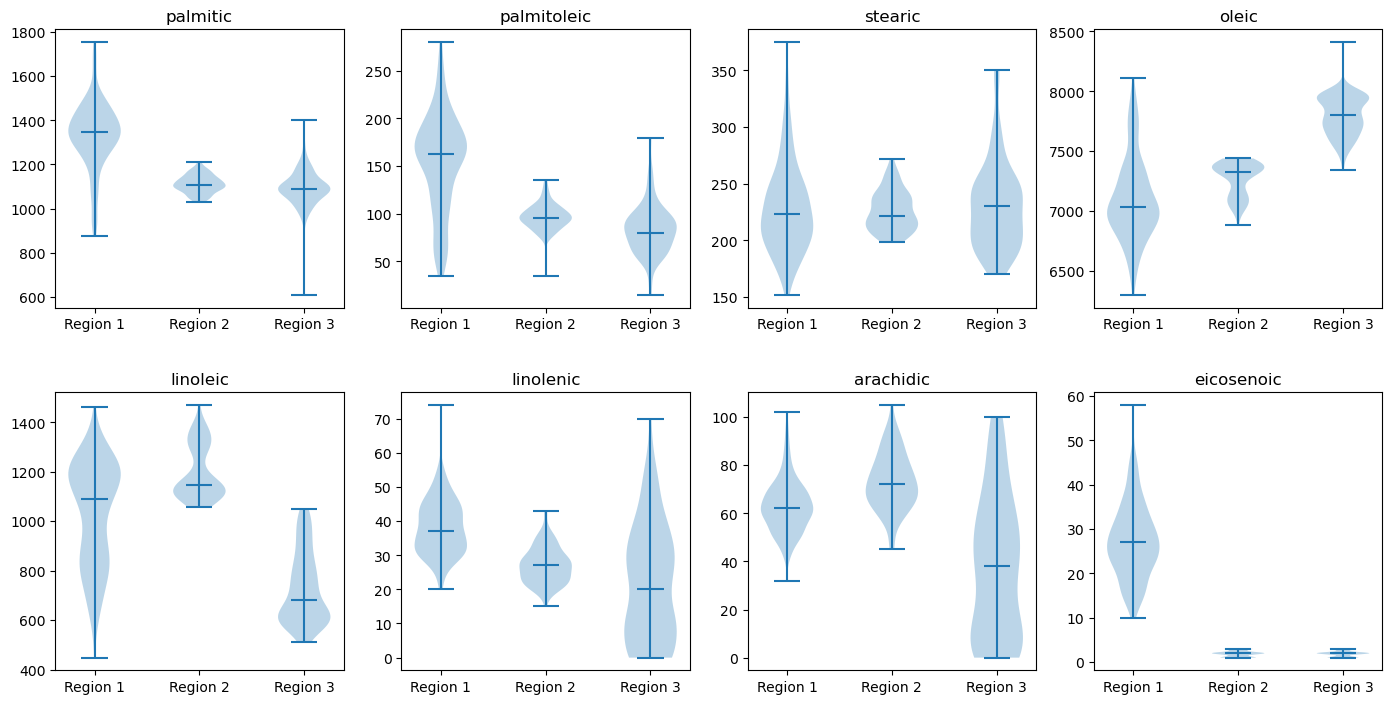

In [9]:
fig, axs = plt.subplots(2,4, figsize=(14,7))
fig.tight_layout(h_pad=4.0)

cols = data.columns[3:]

r1_values = data.where(data.Region == 1).dropna()
r2_values = data.where(data.Region == 2).dropna()
r3_values = data.where(data.Region == 3).dropna()

for idx,c in enumerate(cols):
    val_r1 = r1_values[c]
    val_r2 = r2_values[c]
    val_r3 = r3_values[c]
    axs[idx//4, idx%4].violinplot([val_r1, val_r2, val_r3], showmedians=True)
    axs[idx//4, idx%4].set_title(f"{c}")
    axs[idx//4, idx%4].set_xticks(range(1,4), labels=["Region 1", "Region 2", "Region 3"])
    

# Data preparation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[cols], data.Region, test_size=0.2, random_state=42, stratify=data.Region)

In [13]:
X_train

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
58,1261,153,219,7355,818,52,70,26
172,1413,191,186,6937,1180,31,46,13
552,1020,90,260,7620,1010,0,0,3
7,922,66,264,7990,618,49,56,29
551,1020,90,350,7620,920,10,0,3
...,...,...,...,...,...,...,...,...
407,1110,91,201,7318,1185,24,74,2
99,1311,166,170,6902,1312,41,69,28
368,1076,95,204,7408,1130,27,79,2
156,1451,199,221,6835,1177,37,51,29


In [14]:
y_train.groupby(y_train.values).count()/y_train.count()

1    0.564551
2    0.170678
3    0.264770
Name: Region, dtype: float64

In [15]:
y_test.groupby(y_test.values).count()/y_test.count()

1    0.565217
2    0.173913
3    0.260870
Name: Region, dtype: float64

In [16]:
y_train.count(), y_test.count()

(457, 115)

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train.values)

MinMaxScaler()

In [18]:
scX_train = scaler.transform(X_train.values)
scX_train

array([[0.41981132, 0.52075472, 0.30044843, ..., 0.7027027 , 0.66666667,
        0.45454545],
       [0.5990566 , 0.66415094, 0.15246637, ..., 0.41891892, 0.43809524,
        0.21818182],
       [0.13561321, 0.28301887, 0.48430493, ..., 0.        , 0.        ,
        0.03636364],
       ...,
       [0.20165094, 0.30188679, 0.23318386, ..., 0.36486486, 0.75238095,
        0.01818182],
       [0.64386792, 0.69433962, 0.30941704, ..., 0.5       , 0.48571429,
        0.50909091],
       [0.32429245, 0.32075472, 0.17040359, ..., 0.67567568, 0.95238095,
        0.        ]])

# Modelling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
lr_model = LogisticRegression()
lr_model.fit(scX_train, y_train)

LogisticRegression()

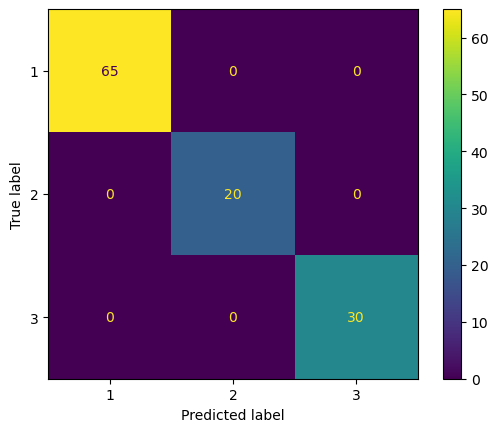

In [22]:
ConfusionMatrixDisplay.from_estimator(lr_model, scaler.transform(X_test.values), y_test)
plt.show()

In [23]:
result = lr_model.predict(scaler.transform(X_test.values))
result_prob = lr_model.predict_proba(scaler.transform(X_test.values)).round(3)

In [24]:
def evaluate(scaler, model, query):
    d = {"claimed": [], "claimed_prob": [], "predict":[], "predict_prob":[], "status":[]}
    
    for q in query:
        claimed = q[0]
        profile = np.array(q[1:]).reshape(1,-1)
        scX = scaler.transform(profile)

        predict = np.squeeze(model.predict(scX))
        result = np.squeeze(model.predict_proba(scX))
        predict_prob = np.squeeze(result[predict -1])
        claimed_prob = result[claimed -1]
        if claimed == predict and predict_prob > 0.85:
            status = ""
        else:
            status = "Warning"

        d["claimed"].append(claimed)
        d["claimed_prob"].append(claimed_prob)
        d["predict"].append(predict)
        d["predict_prob"].append(predict_prob)
        d["status"].append(status)
        
    return pd.DataFrame(d).round(3)

In [25]:
query = [[2, 966,57,240,7952,619,50,78,35], [1, 103,109,220,7335,1140,28,59,2], [3,1114,86,210,7359,1116,31,83,2], [2, 1166,97,272,6971,1390,20,83,3]]

In [26]:
result = evaluate(scaler, lr_model, query)
result

,claimed,claimed_prob,predict,predict_prob,status
0,2,0.017,1,0.885,Warning
1,1,0.003,2,0.958,Warning
2,3,0.116,2,0.785,Warning
3,2,0.931,2,0.931,
